In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/stacked_sentiment_again.csv')
df.shape

(1130, 20)

### basic k-means on all text
- follow steps in [this](https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52) article

In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text_nourl'])

In [4]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [ ]:
for i in range(true_k):
    print(f'Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(f'%s' % terms[ind])

In [6]:
print('')
print('Prediction')
X = vectorizer.transform(['Nothing is easy in cricket. Maybe when you watch it on TV, it looks easy. But it is not. You have to use your brain and time the ball.'])
predicted = model.predict(X)
print(predicted)


Prediction
[0]


### basic k-means on fire text
- follow steps in [this](https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52) article

In [ ]:
df.columns

In [18]:
fire = df[(df['is-fire-related'] == 1)].copy()
fire.shape

(616, 20)

In [19]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(fire['text_nourl'])

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [21]:
for i in range(true_k):
    print(f'Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(f'%s' % terms[ind])

Cluster 0:
ca
info
unofficial
disclaimers
incorrect
officials
safety
images
sacramento
update
Cluster 1:
took
forget
hoping
away
return
lost
day
replace
able
paradise
Cluster 2:
california
chico
camp
paradise
rd
ca
campfire
traffic
closure
nb


In [22]:
# 3 clusters
# cluster 0: information-related
# cluster 1: traffic-related
# cluster 2: emotional

In [23]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [25]:
for i in range(true_k):
    print(f'Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(f'%s' % terms[ind])

Cluster 0:
california
chico
paradise
campfire
just
camp
calfire
butte
posted
people
Cluster 1:
took
forget
hoping
away
return
lost
day
replace
able
paradise
Cluster 2:
rd
traffic
closure
ca
nb
sb
camp
89
hwy
70
Cluster 3:
ca
info
unofficial
disclaimers
incorrect
officials
safety
images
sacramento
update
Cluster 4:
family
friends
families
life
help
paradise
000
ones
today
affected


In [26]:
# 5 clusters:
# 0: photo 
# 1: emotional (negative sentiment)
# 2: traffic
# 3: information
# 4: emotional (positive sentiment)

In [27]:
print('Prediction')
X = vectorizer.transform(['Nothing is easy in cricket. Maybe when you watch it on TV, it looks easy. But it is not. You have to use your brain and time the ball.'])
predicted = model.predict(X)
print(predicted)

Prediction
[0]


In [28]:
fire.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,link,day,hour,minute,during_fire,is-fire-related,text_nourl,key_score,from_locations,sent
0,366.0,"Paradise, CA",1.060000e+18,"::paradise baby:: meet jd, the grandson of my ...",2018-11-16 16:31:06+00:00,#campfire,trekcass,@JulieRems,0,0,https://twitter.com/trekcass/status/1063469521...,16,16,31,1,1,"::paradise baby:: meet JD, the grandson of my ...",2,"Paradise, CA",1.0
1,700.0,"Paradise, CA",1.060000e+18,"¡coño! #campfire @chico, california https://ww...",2018-11-09 19:29:06+00:00,#CampFire,VXO,NaN,0,0,https://twitter.com/VXO/status/106097760184037...,9,19,29,1,1,"¡Coño! #CampFire @Chico, California",1,"Chico, CA",1.0
3,53.0,"Paradise, CA",1.070000e+18,.@stucam7771 nailed it! the man in the white h...,2018-11-24 11:29:40+00:00,NaN,XLComedy,@stucam7771,1,0,https://twitter.com/XLComedy/status/1066292766...,24,11,29,1,1,.@Stucam7771 nailed it! The man in the White H...,1,"Paradise, CA",1.0
5,429.0,"Paradise, CA",1.060000e+18,"“and the peace of god, which transcends all un...",2018-11-15 01:20:54+00:00,#firefighter #calfire #firstresponders,AaronComfortDog,NaN,1,0,https://twitter.com/AaronComfortDog/status/106...,15,1,20,1,1,"“And the peace of God, which transcends all un...",2,"Chico, CA",1.0
8,185.0,"Paradise, CA",1.070000e+18,"“from the ashes, a fire shall be woken, a ligh...",2018-11-20 23:28:54+00:00,NaN,Marcella_renai,NaN,0,0,https://twitter.com/Marcella_renai/status/1065...,20,23,28,1,1,"“From the ashes, a fire shall be woken, A ligh...",1,"Chico, CA",1.0


In [29]:
fire['clusters'] = fire['text_nourl'].apply(lambda x: int(model.predict(vectorizer.transform([x]))[0]))
fire.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,...,day,hour,minute,during_fire,is-fire-related,text_nourl,key_score,from_locations,sent,clusters
0,366.0,"Paradise, CA",1.060000e+18,"::paradise baby:: meet jd, the grandson of my ...",2018-11-16 16:31:06+00:00,#campfire,trekcass,@JulieRems,0,0,...,16,16,31,1,1,"::paradise baby:: meet JD, the grandson of my ...",2,"Paradise, CA",1.0,0
1,700.0,"Paradise, CA",1.060000e+18,"¡coño! #campfire @chico, california https://ww...",2018-11-09 19:29:06+00:00,#CampFire,VXO,NaN,0,0,...,9,19,29,1,1,"¡Coño! #CampFire @Chico, California",1,"Chico, CA",1.0,0
3,53.0,"Paradise, CA",1.070000e+18,.@stucam7771 nailed it! the man in the white h...,2018-11-24 11:29:40+00:00,NaN,XLComedy,@stucam7771,1,0,...,24,11,29,1,1,.@Stucam7771 nailed it! The man in the White H...,1,"Paradise, CA",1.0,0
5,429.0,"Paradise, CA",1.060000e+18,"“and the peace of god, which transcends all un...",2018-11-15 01:20:54+00:00,#firefighter #calfire #firstresponders,AaronComfortDog,NaN,1,0,...,15,1,20,1,1,"“And the peace of God, which transcends all un...",2,"Chico, CA",1.0,0
8,185.0,"Paradise, CA",1.070000e+18,"“from the ashes, a fire shall be woken, a ligh...",2018-11-20 23:28:54+00:00,NaN,Marcella_renai,NaN,0,0,...,20,23,28,1,1,"“From the ashes, a fire shall be woken, A ligh...",1,"Chico, CA",1.0,0


In [ ]:
fire[(fire['key_score'] > 0) & (fire['text_nourl'].str.contains('fire'))][['text_nourl', 'key_score', 'clusters']]

In [40]:
fire.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,...,day,hour,minute,during_fire,is-fire-related,text_nourl,key_score,from_locations,sent,clusters
0,366.0,"Paradise, CA",1.060000e+18,"::paradise baby:: meet jd, the grandson of my ...",2018-11-16 16:31:06+00:00,#campfire,trekcass,@JulieRems,0,0,...,16,16,31,1,1,"::paradise baby:: meet JD, the grandson of my ...",2,"Paradise, CA",1.0,0
1,700.0,"Paradise, CA",1.060000e+18,"¡coño! #campfire @chico, california https://ww...",2018-11-09 19:29:06+00:00,#CampFire,VXO,NaN,0,0,...,9,19,29,1,1,"¡Coño! #CampFire @Chico, California",1,"Chico, CA",1.0,0
3,53.0,"Paradise, CA",1.070000e+18,.@stucam7771 nailed it! the man in the white h...,2018-11-24 11:29:40+00:00,NaN,XLComedy,@stucam7771,1,0,...,24,11,29,1,1,.@Stucam7771 nailed it! The man in the White H...,1,"Paradise, CA",1.0,0
5,429.0,"Paradise, CA",1.060000e+18,"“and the peace of god, which transcends all un...",2018-11-15 01:20:54+00:00,#firefighter #calfire #firstresponders,AaronComfortDog,NaN,1,0,...,15,1,20,1,1,"“And the peace of God, which transcends all un...",2,"Chico, CA",1.0,0
8,185.0,"Paradise, CA",1.070000e+18,"“from the ashes, a fire shall be woken, a ligh...",2018-11-20 23:28:54+00:00,NaN,Marcella_renai,NaN,0,0,...,20,23,28,1,1,"“From the ashes, a fire shall be woken, A ligh...",1,"Chico, CA",1.0,0


In [41]:
fire.to_csv('./datasets/clustered_fires.csv', index = False)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


### chart k-means

In [30]:
df['key_score'].sort_values(ascending=False)

787     6
1083    6
716     6
83      5
85      5
       ..
620     0
619     0
618     0
617     0
564     0
Name: key_score, Length: 1130, dtype: int64

In [ ]:
df.columns

In [31]:
df['from_locations'].value_counts()

Chico, CA              487
Paradise, CA           419
Oroville, CA            71
Butte County            46
Magalia, CA             17
Gridley, CA             14
Sacramento, CA          13
South Oroville, CA      13
Durham, CA               7
Thermalito, CA           5
Folsom, CA               4
Reno, NV                 3
Carson City, NV          3
Oroville East, CA        3
Lodi, CA                 2
Nevada City, CA          2
Redding, CA              2
nolocationfound          2
Napa, CA                 2
Sebastopol, CA           2
Rocklin, CA              2
Glen Ellen, CA           1
Carnelian Bay, CA        1
St Helena, CA            1
Florin, CA               1
Sonoma, CA               1
Yountville, CA           1
Lincoln, CA              1
Incline Village, NV      1
Truckee, CA              1
Carmichael, CA           1
Linda, CA                1
Name: from_locations, dtype: int64

In [32]:
df['locs_no'] = df['from_locations']
df.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,...,day,hour,minute,during_fire,is-fire-related,text_nourl,key_score,from_locations,sent,locs_no
0,366.0,"Paradise, CA",1.060000e+18,"::paradise baby:: meet jd, the grandson of my ...",2018-11-16 16:31:06+00:00,#campfire,trekcass,@JulieRems,0,0,...,16,16,31,1,1,"::paradise baby:: meet JD, the grandson of my ...",2,"Paradise, CA",1.0,"Paradise, CA"
1,700.0,"Paradise, CA",1.060000e+18,"¡coño! #campfire @chico, california https://ww...",2018-11-09 19:29:06+00:00,#CampFire,VXO,NaN,0,0,...,9,19,29,1,1,"¡Coño! #CampFire @Chico, California",1,"Chico, CA",1.0,"Chico, CA"
2,494.0,"Paradise, CA",1.060000e+18,. . . . . #photography #instapics #photographe...,2018-11-13 15:51:31+00:00,#photography #instapics #photographersofig #pi...,sidewayseightp,NaN,0,0,...,13,15,51,1,0,. . . . . #photography #instapics #photographe...,0,"Chico, CA",1.0,"Chico, CA"
3,53.0,"Paradise, CA",1.070000e+18,.@stucam7771 nailed it! the man in the white h...,2018-11-24 11:29:40+00:00,NaN,XLComedy,@stucam7771,1,0,...,24,11,29,1,1,.@Stucam7771 nailed it! The man in the White H...,1,"Paradise, CA",1.0,"Paradise, CA"
4,201.0,"Oroville, CA",1.060000e+18,‘merurica... #voted #uklastudios #uklapictures...,2018-11-07 02:02:51+00:00,#voted #uklastudios #uklapictures,UKLA_Music,NaN,0,0,...,7,2,2,0,0,‘Merurica... #voted #uklastudios #uklapictures...,0,"Gridley, CA",1.0,"Gridley, CA"


In [33]:
df['from_locations'].unique()

array(['Paradise, CA', 'Chico, CA', 'Gridley, CA', 'Oroville, CA',
       'nolocationfound', 'Magalia, CA', 'South Oroville, CA',
       'Durham, CA', 'Nevada City, CA', 'Sacramento, CA', 'Reno, NV',
       'Carson City, NV', 'Butte County', 'Folsom, CA', 'Sebastopol, CA',
       'Napa, CA', 'Carnelian Bay, CA', 'Sonoma, CA', 'Lodi, CA',
       'Carmichael, CA', 'Rocklin, CA', 'Redding, CA', 'Thermalito, CA',
       'Florin, CA', 'Linda, CA', 'Truckee, CA', 'Glen Ellen, CA',
       'St Helena, CA', 'Yountville, CA', 'Lincoln, CA',
       'Oroville East, CA', 'Incline Village, NV'], dtype=object)

In [34]:
all_cities = ['Chico, CA', 'California, USA', 'Sacramento, CA', 'Reno, NV',
       'Rocklin, CA', 'Folsom, CA', 'Oroville, CA', 'Florin, CA',
       'Nevada City, CA', 'Yountville, CA', 'Redding, CA', 'Linda, CA',
       'Magalia, CA', 'Paradise, CA', 'nolocationfound', 'Durham, CA',
       'Napa, CA', 'Glen Ellen, CA', 'Oroville East, CA',
       'South Oroville, CA', 'Thermalito, CA', 'Gridley, CA']

butte_cty = ['Chico, CA',  'Oroville, CA', 'Magalia, CA', 'Paradise, CA',  
             'Durham, CA', 'Oroville East, CA', 'South Oroville, CA', 
             'Thermalito, CA', 'Gridley, CA']

not_butte = ['California, USA', 'Sacramento, CA', 'Reno, NV','Rocklin, CA', 
             'Folsom, CA', 'Florin, CA','Nevada City, CA', 'Yountville, CA', 
             'Redding, CA', 'Linda, CA', 'nolocationfound', 'Napa, CA', 
             'Glen Ellen, CA',]

In [35]:
df['locs_no'] = df['locs_no'].replace(['Chico, CA',  'Oroville, CA', 'Magalia, CA', 'Paradise, CA',  
             'Durham, CA', 'Oroville East, CA', 'South Oroville, CA', 
             'Thermalito, CA', 'Gridley, CA'], 1)

In [36]:
df['locs_no'] = df['locs_no'].replace(['California, USA', 'Sacramento, CA', 'Reno, NV','Rocklin, CA', 
             'Folsom, CA', 'Florin, CA','Nevada City, CA', 'Yountville, CA', 
             'Redding, CA', 'Linda, CA', 'nolocationfound', 'Napa, CA', 
             'Glen Ellen, CA',], 0)

In [ ]:
df.head()

In [37]:
df_cluster = df[['key_score', 'locs_no']]

ValueError: could not convert string to float: 'Carson City, NV'

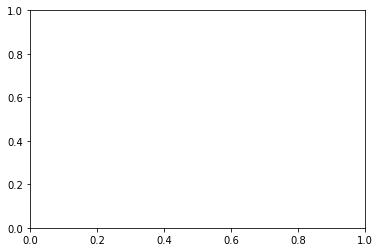

In [38]:
plt.scatter(x=df_cluster['key_score'],
            y=df_cluster['locs_no'],
            c='b');

plt.xlabel("$X_1$", fontsize=18);
plt.ylabel("$X_2$", fontsize=18);

In [39]:
df['timestamp'].sort_values()

376     2018-11-01 00:10:34+00:00
554     2018-11-01 00:12:17+00:00
551     2018-11-01 00:12:58+00:00
697     2018-11-01 00:18:43+00:00
698     2018-11-01 00:19:37+00:00
                  ...            
881     2018-11-25 23:45:36+00:00
968     2018-11-25 23:48:52+00:00
419     2018-11-25 23:51:06+00:00
1104    2018-11-25 23:54:12+00:00
735     2018-11-25 23:58:04+00:00
Name: timestamp, Length: 1130, dtype: object

In [ ]:
df.sort_values(by='timestamp')

In [ ]:
cities = pd.read_csv('./datasets/cities_clean.csv')

In [ ]:
cities.sort_values(by='timestamp')

In [ ]:
cities.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 

In [ ]:
cities.shape

In [ ]:
cities.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 
cities.shape

In [ ]:
cities.dtypes

In [ ]:
cities['timestamp'] = pd.to_datetime(cities['timestamp'])

In [ ]:
cities.dtypes

In [ ]:
plt.hist(cities['timestamp'])

In [ ]:
import datetime

In [ ]:
cities.shape

In [ ]:
cities.columns

In [ ]:
df.head()

In [ ]:
df.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 
df.head()

In [ ]:
df.shape

In [ ]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px

In [ ]:
# Simple line graph of apple high prices
fig = px.line(df, # data
             x = 'timestamp', # date for x-axis
             y = 'key_score' ) # plot close price
fig.show()

In [ ]:
df.columns

In [ ]:
df.from_locations.value_counts()

In [ ]:
pd.set_option('display.max_rows', 500) #display max rows
df[(df.from_locations == 'California, USA')] 